### Singlephotoelectron mini analysis

One of the key requirements to increase our sensitivity to low Energy Recoil events is to lower our S1 energy threshold as much as possible. 
Close to the threshold, it is important to quantify the signal acceptance, including the acceptance of the self-trigger threshold. Since the self-trigger threshold is applied to the amplitude of the signal on each channel, in this note we will try and quantify the acceptance of the single photoelectron signal as a function of the amplitude threshold.

The self-trigger threshold acts on the amplitude of the waveform, recording data if the maximum amplitude exceeds a specified threshold. The value of the threshold depends on two competing requirements:

- The noise on each channel sets the lower limit for the self-trigger threshold which is the first cut placed on the data; 
- The signal acceptance determines the upper limit for the self-trigger threshold.

For the commissioning phase:

- Reduce the noise levels as much as possible: HV Filter Box and Noise hunting;
- Set the self-trigger threshold on each channel such that it triggers on the noise less often than a specified rate;
- For the above determined self-trigger threshold, studying the SPE acceptance as a function of the amplitude for different HV setting.

What we are looking for:

- Acceptance @ 15 ADC;
- ADC threshold such that the acceptance is 90%;

Note that even if the PMT HV is set by some other criterion (for example by the maximum voltage before it starts emitting light) it is important to know what the single photoelectron acceptance is for each channel because the SPE acceptance will be used as input for the detection efficiency. More over, it has been used as rejection for the analysis if it is lower than 50%.


### LED calibration plug-in

The plug-in for getting the LED data can be find here: https://github.com/XENONnT/straxen/blob/led_plugin/straxen/plugins/led_calibration.py.

The motivation for this analysis is to estimate the SPE acceptance using low-intensity LED runs.

Before using the plugin, the LED windwos and the noise window have to be indentificated.

In [1]:
%run '/home/gvolta/XENONnT/LedAnalysis/Initialization_for_SPE.py'

               option          default    current          applies_to  \
0          led_window       (150, 275)  <OMITTED>  (led_calibration,)   
1        noise_window         (0, 125)  <OMITTED>  (led_calibration,)   
2        channel_list         (0, 248)  <OMITTED>  (led_calibration,)   
3         pax_raw_dir  /data/xenon/raw  <OMITTED>      (raw_records,)   
4     stop_after_zips                0  <OMITTED>      (raw_records,)   
5    events_per_chunk               50  <OMITTED>      (raw_records,)   
6  samples_per_record              110  <OMITTED>      (raw_records,)   

                                                help  
0  Window (samples) where we expect the signal in...  
1             Window (samples) to analysis the noise  
2  Three different light level for XENON1T: (0,36...  
3                    Directory with raw pax datasets  
4         Convert only this many zip files. 0 = all.  
5                Number of events to yield per chunk  
6                       Number

In [2]:
runs = st.select_runs(run_mode='LED*')

Checking data availability: 100%|██████████| 5/5 [00:43<00:00,  7.81s/it]


#### Determining LED and noise window:
- Identify the rough amplitude range corresponding to a single photoelectron;
- Find the time window in which we have an excess of sample in this amplitude range;
- Define the noise window far from the LED window.

In [3]:
run_id = '180219_1049'
data_rr = st.get_array(run_id, 'raw_records', seconds_range=(0,10))

In [4]:
datatype = [('pmt', np.int16),
            ('Amplitude', np.float32),
            ('Sample of Amplitude', np.float32)]

Data = np.zeros((len(data_rr)), dtype = datatype)

for i in range(len(data_rr)):
    Data[i]['pmt'] = data_rr['channel'][i]
    Data[i]['Amplitude'] = np.max(data_rr['data'][i])
    Data[i]['Sample of Amplitude'] = np.argmax(data_rr['data'][i])

In [5]:
window = SPErough(data = Data) #info, df2 

  0%|          | 1/248 [00:00<00:45,  5.37it/s]/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/scipy/optimize/minpack.py:733: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.6/site-packages/scipy/optimize/minpack.py:799: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
100%|██████████| 248/248 [00:04<00:00, 57.88it/s] 


In [6]:
length = window[1]-window[0]
window_noise = [5, 5+length]

Start 25: 2018-02-19 10:50:00.034530130
Start 151: 2018-02-19 10:50:00.024699790


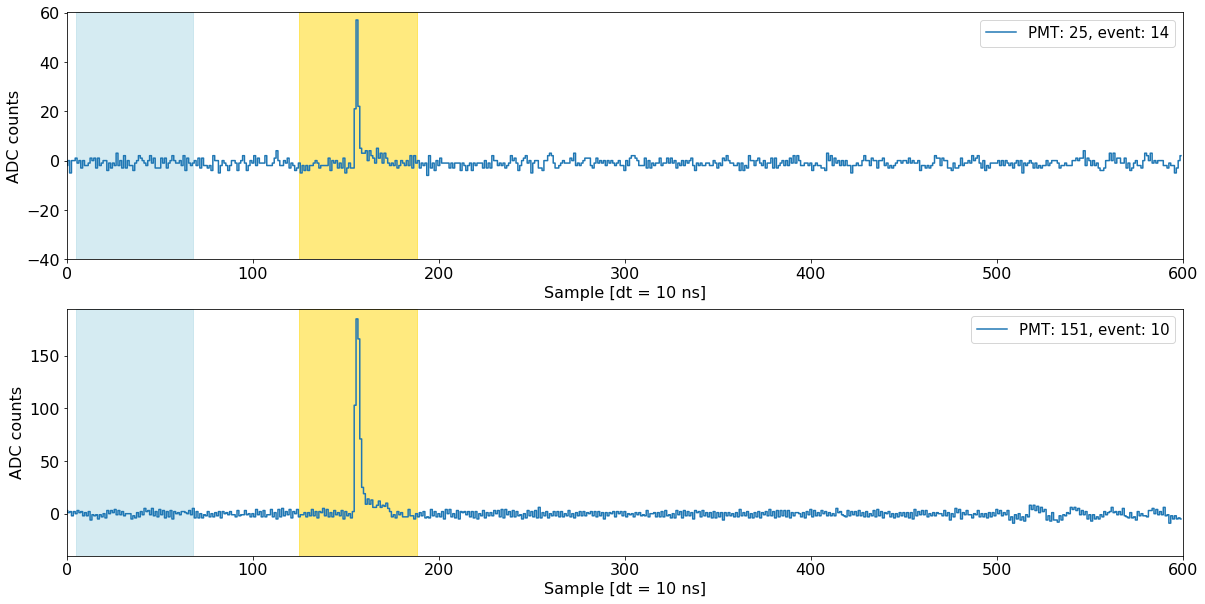

In [7]:
plt.figure(figsize=(20,10))
###################################################################
PMT_n = data_rr[data_rr['channel']==25]
plt.subplot(211)
event = 14
plot_peak(PMT_n[event], label = 'PMT: ' + str(PMT_n[event]['channel']) + ', event: ' + str(event))
plt.axvspan(window[0], window[1], alpha=0.5, color='gold')
plt.axvspan(window_noise[0], window_noise[1], alpha=0.5, color='lightblue')
plt.legend(loc='best', fontsize=15)
plt.ylim(bottom = -40)
plt.xlim(0, 600)
###################################################################
PMT_n = data_rr[data_rr['channel']==151]
plt.subplot(212)
event = 10
plot_peak(PMT_n[event], label = 'PMT: ' + str(PMT_n[event]['channel']) + ', event: ' + str(event))
plt.axvspan(window[0], window[1], alpha=0.5, color='gold')
plt.axvspan(window_noise[0], window_noise[1], alpha=0.5, color='lightblue')
plt.legend(loc='best', fontsize=15)
plt.ylim(bottom = -40)
plt.xlim(0, 600)
###################################################################
plt.show()

### SPE accepante
- Evan's note: https://xe1t-wiki.lngs.infn.it/doku.php?id=xenon:saldanha:xe1t:single_photoelectron_amplitude

In [8]:
st_2 = st.new_context(config=dict(led_window=(window[0],window[1]), noise_window=(window_noise[0], window_noise[1])))
st_2.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)","(125, 188)","(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)","(5, 68)","(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)",<OMITTED>,"(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [9]:
run_id = '180219_1049'
data_SPE = st_2.get_iter(run_id, 'led_calibration')

1. _Scale down the off-time amplitude spectrum such that the total counts below the ADC_correction count threshold is the same as in the LED spectrum

2. For the final acceptance values we have varied the threshold ACD counts between 3 and 7 ADC counts to study the systematic effect this has on the result.

In [ ]:
SPE = ScalingSpectrum(data = data_SPE)

**The acceptance as a function of amplitude (threshold) is defined as the fraction of noise-subtracted single photoelectron spectrum above that amplitude.**

In [ ]:
SPE_acceptance = SPE_Acceptance(data = SPE)

### SPE accepante: data visualization

In [ ]:
top_pos_x = []
top_pos_y = []
bot_pos_x = []
bot_pos_y = []
acc_top = []
thr_top = []
acc_bot = []
thr_bot = []
bin_correction = 3
for i in range(0,127):
        top_pos_x.append(PMT_positions[i]['x'])
        top_pos_y.append(PMT_positions[i]['y'])
        acc_top.append(SPE_acceptance[i]['Acceptance @ 15 ADC '+str(bin_correction)+' bin']*100)
        thr_top.append(SPE_acceptance[i]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'])
for i in range(127,248):
        bot_pos_x.append(PMT_positions[i]['x'])
        bot_pos_y.append(PMT_positions[i]['y'])
        acc_bot.append(SPE_acceptance[i]['Acceptance @ 15 ADC '+str(bin_correction)+' bin']*100)
        thr_bot.append(SPE_acceptance[i]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'])

In [ ]:
################################# Looking for the the SPE acceptance at 15 ADC as threshold #################################

print('#################################################')
print('############### Bin Correction: '+str(bin_correction)+' ###############')
print('#################################################')

fig = plt.figure(figsize=(20,9))
###################################################################
plt.subplot(121)

#questo fa solo il disegnino dei PMT
patches = []
for ch in range(0, len(acc_top)):
    circle = Circle((top_pos_x[ch],top_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch), xy=(top_pos_x[ch],top_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(acc_top))
#qui plotta la luce che vedono
p.set_clim([min(acc_top),max(acc_top)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="Acceptance @ 15 ADC [%]")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

###################################################################
plt.subplot(122)

patches = []
for ch in range(0, len(acc_bot)):
    circle = Circle((bot_pos_x[ch],bot_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch+127), xy=(bot_pos_x[ch],bot_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(acc_bot))
p.set_clim([min(acc_bot),max(acc_bot)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="Acceptance @ 15 ADC [%]")
ax.text(0.05, 0.95, "Bot PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

############################### Looking for the threshold such that the SPE acceptance is 90% ###############################

fig = plt.figure(figsize=(20,9))
###################################################################
plt.subplot(121)

#questo fa solo il disegnino dei PMT
patches = []
for ch in range(0, len(thr_top)):
    circle = Circle((top_pos_x[ch],top_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch), xy=(top_pos_x[ch],top_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(thr_top))
#qui plotta la luce che vedono
p.set_clim([min(thr_top),max(thr_top)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="ADC for 90% acceptance")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

###################################################################
plt.subplot(122)

patches = []
for ch in range(0, len(thr_bot)):
    circle = Circle((bot_pos_x[ch],bot_pos_y[ch]), 3.875)
    patches.append(circle)
    plt.annotate(str(ch+127), xy=(bot_pos_x[ch],bot_pos_y[ch]), fontsize=12, ha='center', va='center')
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(np.array(thr_bot))
p.set_clim([min(thr_bot),max(thr_bot)])

ax = plt.gca()
ax.add_collection(p)
ax.add_collection(PatchCollection([Circle((0,0), 47.9)], 
                                  facecolor='none', edgecolor='black', alpha=1.0))
plt.colorbar(p, ax=ax, pad=0.01, label="ADC for 90% acceptance")
ax.text(0.05, 0.95, "Bot PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75))

plt.xlabel('x-position [cm]')
plt.ylabel('y-position [cm]')
plt.axis('equal')
###################################################################

In [ ]:
print('#################################################')
print('############### Bin Correction: '+str(bin_correction)+' ###############')
print('#################################################')

fig = plt.figure(figsize=(25,10))
n_channel = 181
mask = np.where(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]<0.01)
x_max = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0][mask][0]

plt.subplot(121)

plt.plot(SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
         color='r', label='Amp LED')
plt.plot(SPE[SPE['pmt']==n_channel]['bins_NOISE_center'][0], SPE[SPE['pmt']==n_channel]['spectrumNOISE'][0], 
         color='k', label='Amp noise')

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], y = SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumLED'][0]), fmt='ro', ms = 4, label='LED')

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_NOISE_center'][0],  y = SPE[SPE['pmt']==n_channel]['spectrumNOISE'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumNOISE'][0]), fmt='ko', ms = 4, label='noise')

plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.yscale('log')
plt.legend(loc='best', fontsize=20)
plt.xlim(0)

plt.subplot(122)

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], y = SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumLED'][0]), fmt='ro', ms = 4, label='spectrumLED')

plt.errorbar(x = SPE[SPE['pmt']==n_channel]['bins_NOISE_center'][0],  
             y = SPE[SPE['pmt']==n_channel]['spectrumNOISE_scaled_'+str(bin_correction)+'bin'][0], 
             yerr = np.sqrt(SPE[SPE['pmt']==n_channel]['spectrumNOISE_scaled_'+str(bin_correction)+'bin'][0]), 
             fmt='ko', ms = 4, label='noise scaled')

plt.xlim(left = 0, right=30)
plt.yscale('log')
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=20)


fig = plt.figure(figsize=(25,10))

plt.subplot(121)

plt.errorbar(x = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
             y = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             yerr = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['error of noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             fmt='b+', label='noise-subtracted SPE spectrum')

#plt.xlim(left = 0)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=17)

plt.subplot(122)

plt.plot(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
         SPE_acceptance[SPE_acceptance['pmt']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]) 

plt.text(55, 1.07, 
         'Acceptance @ 15 ADC = %.2f'%(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['Acceptance @ 15 ADC '+str(bin_correction)+' bin'][0]),
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.text(55, 1, 
         'ADC for 0.9 acceptance = %.2f'%(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'][0]), 
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.hlines(y=0.9, xmin=0, xmax=x_max, colors='k', linestyles='dashed')
plt.vlines(x=15, ymin=0, ymax=1, colors='k', linestyles='dashed')
plt.title('Acceptance', fontsize=26)
plt.ylim(0,1.1)
plt.xlim(0, x_max)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
#plt.legend(loc='best', fontsize=15)

plt.show()

### SPE value: $\mu \pm \sigma$ 

- As best value for the acceptance we can take the average;
- In order to quantify the statistic error we can use the standard deviation of the mean;
- The systematic error can be studyed changing the time window for the LED and for the noise and analyze how the acceptance change.

In [ ]:
mean_acc = np.zeros(248, dtype = np.float32)
std_acc = np.zeros(248,  dtype = np.float32)
mean_thr = np.zeros(248, dtype = np.float32)
std_thr = np.zeros(248,  dtype = np.float32)

for i in range(len(mean_acc)):
    mean_acc[i] = np.mean([SPE_acceptance[i]['Acceptance @ 15 ADC '+str(j)+' bin']*100 for j in range(3,8)])
    std_acc[i]  = np.std([SPE_acceptance[i]['Acceptance @ 15 ADC '+str(j)+' bin']*100 for j in range(3,8)])/5
    mean_thr[i] = np.mean([SPE_acceptance[i]['Threshold for 0.9 acceptance '+str(j)+' bin'] for j in range(3,8)])
    std_thr[i]  = np.std([SPE_acceptance[i]['Threshold for 0.9 acceptance '+str(j)+' bin'] for j in range(3,8)])/5

In [ ]:
fig = plt.figure(figsize=(25,20))

plt.subplot(211)
patches = []
x = 1
y = 1
top = 127
for ch in range(0, top):
    circle = Circle((x,y), 1+5*std_acc[ch])
    patches.append(circle)
    plt.annotate(str(ch), xy=(x, y), fontsize=12, ha='center', va='center')
    x = x + 5
    if x>70:
        x = 1
        y = y + 5
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(mean_acc[:top])
#qui plotta la luce che vedono
p.set_clim([min(mean_acc[:top]),max(mean_acc[:top])])

ax = plt.gca()
ax.add_collection(p)
plt.colorbar(p, ax=ax, pad=0.01, label="Mean acceptance @ 15 ADC")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), fontsize=17)

plt.axis('equal')
plt.xticks([])
plt.yticks([])

plt.subplot(212)
patches = []
x = 1
y = 1
bot = 248
for ch in range(top, bot):
    circle = Circle((x,y), 1+5*std_acc[ch])
    patches.append(circle)
    plt.annotate(str(ch), xy=(x, y), fontsize=12, ha='center', va='center')
    x = x + 5
    if x>70:
        x = 1
        y = y + 5
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(mean_acc[top:bot])
#qui plotta la luce che vedono
p.set_clim([min(mean_acc[top:bot]),max(mean_acc[top:bot])])

ax = plt.gca()
ax.add_collection(p)
plt.colorbar(p, ax=ax, pad=0.01, label="Mean acceptance @ 15 ADC")
ax.text(0.05, 0.95, "Bottom PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), fontsize=17)

plt.axis('equal')
plt.xticks([])
plt.yticks([])


plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))

plt.subplot(211)
patches = []
x = 1
y = 1
top = 127
for ch in range(0, top):
    circle = Circle((x,y), 1+5*std_thr[ch])
    patches.append(circle)
    plt.annotate(str(ch), xy=(x, y), fontsize=12, ha='center', va='center')
    x = x + 4
    if x>50:
        x = 1
        y = y + 4
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(mean_thr[:top])
#qui plotta la luce che vedono
p.set_clim([min(mean_thr[:top]),max(mean_thr[:top])])

ax = plt.gca()
ax.add_collection(p)
plt.colorbar(p, ax=ax, pad=0.01, label="Mean ADC Threshold for 90% acceptance")
ax.text(0.05, 0.95, "Top PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), fontsize=17)

plt.axis('equal')
plt.xticks([])
plt.yticks([])

plt.subplot(212)
patches = []
x = 1
y = 1
bot = 248
for ch in range(top, bot):
    circle = Circle((x,y), 1+5*std_thr[ch])
    patches.append(circle)
    plt.annotate(str(ch), xy=(x, y), fontsize=12, ha='center', va='center')
    x = x + 4
    if x>50:
        x = 1
        y = y + 4
    
p = PatchCollection(patches, cmap='Pastel1', alpha=1.0, edgecolor='black') # facecolor='none'
p.set_array(mean_thr[top:bot])
#qui plotta la luce che vedono
p.set_clim([min(mean_thr[top:bot]),max(mean_thr[top:bot])])

ax = plt.gca()
ax.add_collection(p)
plt.colorbar(p, ax=ax, pad=0.01, label="Mean ADC Threshold for 90% acceptance")
ax.text(0.05, 0.95, "Bottom PMTs", transform=ax.transAxes, horizontalalignment='left',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), fontsize=17)

plt.axis('equal')
plt.xticks([])
plt.yticks([])

plt.show()

### Single PMT watching

In [ ]:
#######################################
## Which channel do you want to see? ##
#######################################
n_channel = 145

bins_correction = np.linspace(3,7,5)
acceptance = [SPE_acceptance[n_channel]['Acceptance @ 15 ADC '+str(j)+' bin']*100 for j in range(3,8)]
threshold  = [SPE_acceptance[n_channel]['Threshold for 0.9 acceptance '+str(j)+' bin'] for j in range(3,8)]

bin_correction_ = 7
mask = np.where(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['SPE acceptance '+str(bin_correction_)+' bin'][0]<0.01)
x_max = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction_)+' bin'][0][mask][0]

In [ ]:
fig = plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(bins_correction, acceptance, 'b+', ms=8,
         label = '({0:.1f} $\pm$ {1:.1f})%'.format(mean_acc[n_channel], std_acc[n_channel]))
#plt.xlim(left = 0)
plt.xlabel('Bin correction', fontsize=15)
plt.ylabel('Acceptance @ 15 ADC', fontsize=15)
plt.title('Channel %d' %n_channel, fontsize=15)
plt.legend(loc='best', fontsize=13)

plt.subplot(122)
plt.plot(bins_correction, threshold, 'b+', ms=8,
         label = '({0:.1f} $\pm$ {1:.1f}) ADC'.format(mean_thr[n_channel], std_thr[n_channel]))
#plt.xlim(left = 0)
plt.xlabel('Bin correction', fontsize=15)
plt.ylabel('ADC Threshold for 90% acceptance', fontsize=15)
plt.title('Channel %d' %n_channel, fontsize=15)
plt.legend(loc='best', fontsize=13)

plt.show()
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=(15,20))
plt.subplot(211)
for bin_correction in range(3,8):
    plt.errorbar(x = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
                 y = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
                 yerr = SPE_acceptance[SPE_acceptance['pmt']==n_channel]['error of noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
                 fmt='+', 
                 label='noise-subtracted SPE spectrum '+str(bin_correction)+' bin')

plt.xlim(0, x_max)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=10)

plt.subplot(212)

for bin_correction in range(3,8):
    plt.plot(SPE_acceptance[SPE_acceptance['pmt']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
             SPE_acceptance[SPE_acceptance['pmt']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0],
             label='noise-subtracted SPE spectrum '+str(bin_correction)+' bin') 

plt.title('Acceptance', fontsize=26)
plt.ylim(0,1.1)
plt.xlim(0, x_max)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=10)

plt.show()

**The spectrum also contains contributions of 2 or more photoelectrons. From the scaling down factor of the noise s, 
assuming a Poisson distribution of photoelectrons we estimate that the average number of photoelectrons (occupancy) in the
spectrum occ = -ln(s). The fraction of events with 2 or more photoelectrons is then:** 

$P(n>2) = 1 - [P(n=0) + P(n=1)]$

**The contribution of 2 or more photoelectrons leads to a slight over-estimate in the acceptances.
While we have subtracted out the noise contribution to the amplitude when there are no photoelectrons, 
the noise also contributes to the amplitude when there is a photoelectron (the signal sits on top of the noise). 
This noise smears out the true SPE amplitude spectrum.**

In [ ]:
def fraction_no_SPE(occ):
    return 1 - np.exp(-occ)*(1+occ)

fraction = np.zeros(5)
for i in range(5):
    fraction[i] = fraction_no_SPE(SPE[SPE['pmt']==n_channel]['occupancy_'+str(i+3)+'bin'][0])
    print(i+3, fraction[i])
    
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(bins_correction, fraction, 'b+', ms=8)
plt.xlabel('Bin correction', fontsize=15)
plt.ylabel('# of events bigger than SPE', fontsize=15)
plt.title('Channel %d' %n_channel, fontsize=15)
#plt.xlim(left = 0)
#plt.legend(loc='best', fontsize=17)

plt.subplot(122)

N = sum(SPE[SPE['pmt']==n_channel]['spectrumLED'][0])*10
OPE_vals = sp.stats.norm.rvs(loc=info['noise_mu'][181], scale=info['noise_sigma'][181], size=N)
OPE_spectrum, OPE_bins = np.histogram(OPE_vals, bins=400, range=(-100.5, 500.5))
OPE_bins = 0.5 * (OPE_bins[1:] + OPE_bins[:-1])

SPE_vals = sp.stats.norm.rvs(loc=info['LED_mu'][181], scale=info['LED_sigma'][181], size=N)
SPE_spectrum, SPE_bins = np.histogram(SPE_vals, bins=400, range=(-100.5, 500.5))
SPE_bins = 0.5 * (SPE_bins[1:] + SPE_bins[:-1])

DPE_vals = sp.stats.norm.rvs(loc=2*info['LED_mu'][181], scale=np.sqrt(2)*info['LED_sigma'][181], size=N)
DPE_spectrum, DPE_bins = np.histogram(DPE_vals, bins=400, range=(-100.5, 500.5))
DPE_bins = 0.5 * (DPE_bins[1:] + DPE_bins[:-1])

TPE_vals = sp.stats.norm.rvs(loc=3*info['LED_mu'][181], scale=np.sqrt(3)*info['LED_sigma'][181], size=N)
TPE_spectrum, TPE_bins = np.histogram(TPE_vals, bins=400, range=(-100.5, 500.5))
TPE_bins = 0.5 * (TPE_bins[1:] + TPE_bins[:-1])

    
    

plt.plot(SPE[SPE['pmt']==n_channel]['bins_LED_center'][0], SPE[SPE['pmt']==n_channel]['spectrumLED'][0], 
         color='r', label='Amp LED', lw=1)

plt.plot(OPE_bins, OPE_spectrum*0.94, color='black')
plt.plot(SPE_bins, SPE_spectrum*0.06, color='black')
plt.plot(DPE_bins, DPE_spectrum*0.00169, color='black')
plt.plot(TPE_bins, TPE_spectrum*0.0000678, color='black')

plt.xlabel('amp (ADC counts)', fontsize=15)
plt.title('Channel %d' %n_channel, fontsize=15)
#plt.yscale('log')
#plt.legend(loc='best', fontsize=20)
plt.ylim(0, 2000)